In this book we plot which gear is used in which point of track

# Importing modules and enable cache

In [1]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

fastf1.Cache.enable_cache(r'C:\Users\harsh\jupyter\f1_data_analysis\cache')

# load session and lap data

In [2]:
session = fastf1.get_session(2022,'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
print('Fastest lap time:',lap['LapTime'])
print('Fastest Driver:',lap['Driver'])

utils          INFO 	NumExpr defaulting to 8 threads.
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '63', '31', '20', '47', '14', '44', '10', '23', '77', '11', '22', '4', '3', '18', '24', '6', '5']


Fastest lap time: 0 days 00:01:04.984000
Fastest Driver: VER


In [3]:
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-07-08 16:19:54.223,0 days 01:34:54.213000,,424.097500,0 days 00:00:00,11431,289,7,100,False,12,interpolation,0.186010,0.000043,OnTrack,1096,-1205,7215
3,2022-07-08 16:19:54.311,0 days 01:34:54.301000,,424.097500,0 days 00:00:00.088000,11473,290,7,100,False,12,car,7.302222,0.001699,OnTrack,1029,-1227,7215
4,2022-07-08 16:19:54.318,0 days 01:34:54.308000,,424.097500,0 days 00:00:00.095000,11240,291,7,100,False,12,pos,7.869366,0.001831,OnTrack,1024,-1229,7215
5,2022-07-08 16:19:54.618,0 days 01:34:54.608000,,424.097500,0 days 00:00:00.395000,11007,292,7,100,False,12,pos,32.319867,0.007519,OnTrack,774,-1297,7214
6,2022-07-08 16:19:54.791,0 days 01:34:54.781000,55,424.097500,0 days 00:00:00.568000,10775,294,7,100,False,12,car,46.502222,0.010819,OnTrack,647,-1330,7213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2022-07-08 16:20:58.911,0 days 01:35:58.901000,55,433.313889,0 days 00:01:04.688000,11356,287,7,100,False,12,car,4266.172778,0.992504,OnTrack,1319,-1150,7215
494,2022-07-08 16:20:58.958,0 days 01:35:58.948000,55,431.002778,0 days 00:01:04.735000,11347,287,7,100,False,12,pos,4269.916963,0.993375,OnTrack,1282,-1160,7215
495,2022-07-08 16:20:59.018,0 days 01:35:59.008000,55,428.691667,0 days 00:01:04.795000,11338,287,7,100,False,12,pos,4274.691744,0.994486,OnTrack,1235,-1172,7214
496,2022-07-08 16:20:59.071,0 days 01:35:59.061000,55,426.380556,0 days 00:01:04.848000,11329,287,7,100,False,12,car,4278.928333,0.995471,OnTrack,1193,-1182,7213


# Preparing gear shift data for plotting

In [4]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)
points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]],axis=1)
gear = tel['nGear'].to_numpy().astype(float)

# Plotting the data on the circuit map

In [5]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

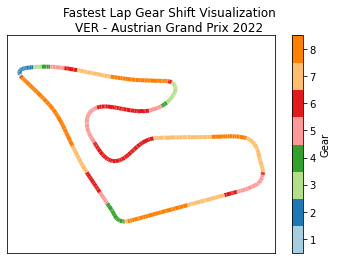

In [6]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()